In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_FRPS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.668464,#VALUE!,#VALUE!,0.567248,0.506609,0.655030,0.636979,0.536181,0.506654,0.518761,0.496152,0.459147,0.449182,0.353947,0.357103,0.329711,0.304403,4
1,1997-02-28 00:00:00,0.624202,#VALUE!,#VALUE!,0.680081,0.668988,0.563555,0.562441,0.449556,0.436823,0.418170,0.399000,0.432388,0.428415,0.347527,0.347865,0.350774,0.343032,4
2,1997-03-31 00:00:00,0.636686,#VALUE!,#VALUE!,0.502622,0.568925,0.479497,0.450737,0.450872,0.413733,0.399141,0.374429,0.405359,0.388403,0.373381,0.367970,0.286711,0.279589,4
3,1997-04-30 00:00:00,0.671868,#VALUE!,#VALUE!,0.427443,0.382158,0.399787,0.374874,0.405612,0.390073,0.368219,0.351346,0.356374,0.340721,0.337753,0.348024,0.255888,0.283248,4
4,1997-05-31 00:00:00,0.653710,#VALUE!,#VALUE!,0.551612,0.482485,0.356650,0.347836,0.343839,0.322845,0.385693,0.368022,0.375736,0.351954,0.371183,0.374078,0.293054,0.312884,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.499596,0.486959,0.491705,0.485184,0.488772,0.494764,0.495848,0.487819,0.497761,0.473469,0.482113,0.462641,0.461482,2.55914
std,0.199647,0.233621,0.234617,0.232990,0.235452,0.231428,0.236072,0.225139,0.229379,0.231109,0.227496,0.227934,0.220252,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.371684,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.515250,0.514152,0.507158,0.507324,0.513215,0.510664,0.510860,0.502246,0.500336,0.479800,0.491677,0.482190,0.470409,3.00000
75%,0.623067,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               240 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 85th percentile (top 15%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 85th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.85) # every data point over the 85th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.67317349995


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.00000
mean,0.777100,0.469391,0.470549,0.478338,0.452567,0.514339,0.483911,0.521082,0.491103,0.505788,0.470644,0.520990,0.506182,3.00000
std,0.078470,0.305394,0.321926,0.328622,0.331239,0.330769,0.324211,0.310640,0.306580,0.293592,0.291009,0.204145,0.208351,0.92582
min,0.674138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215742,0.233296,1.00000
25%,0.704497,0.281799,0.255575,0.193521,0.168788,0.282061,0.302523,0.363712,0.353838,0.381427,0.357708,0.421525,0.405446,2.00000
50%,0.780820,0.490537,0.464469,0.517857,0.475121,0.577953,0.488542,0.539982,0.484107,0.455032,0.397767,0.481872,0.457363,3.00000
75%,0.822812,0.673103,0.668796,0.673922,0.649349,0.681573,0.635018,0.695506,0.598190,0.622838,0.550537,0.528983,0.477998,4.00000
max,0.968081,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 3-mo (Treasury)  36.0  0.469391  0.305394  0.050899   
 2                         combined  72.0  0.623246  0.270214  0.031845   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.366061  0.572721  
 2   0.559748  0.686743  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.3077
 1                              Degrees of freedom =   70.0000
 2                                               t =    5.8553
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.3801
 7                                       Hedge's g =    1.3653
 8                        

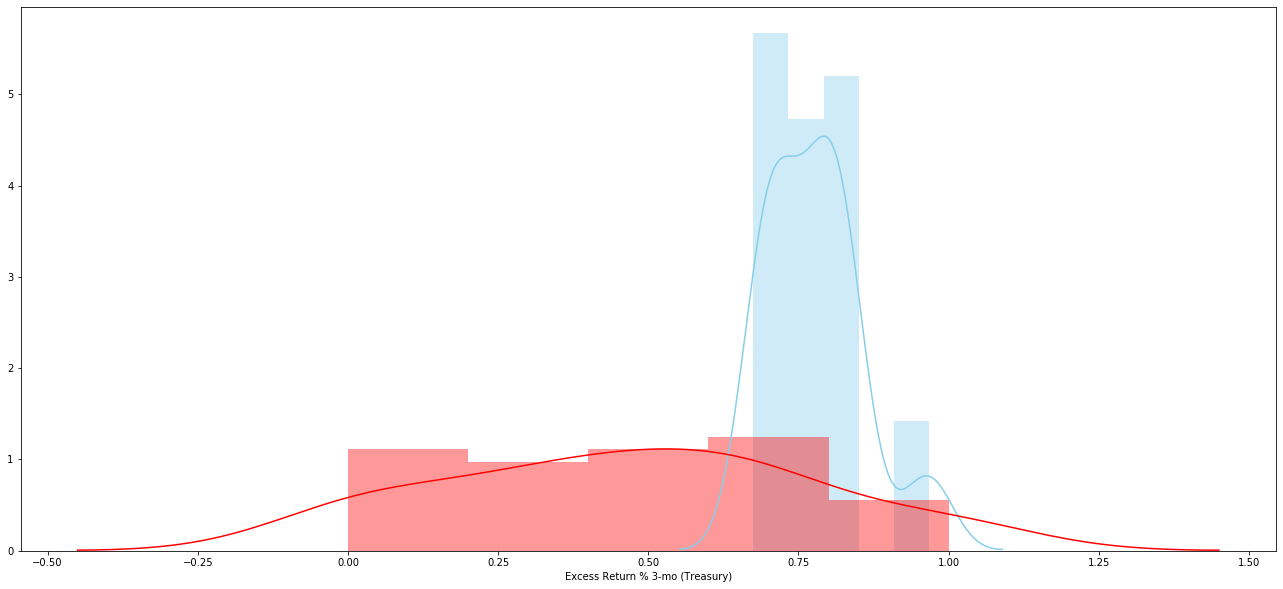

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  36.0  0.777100  0.078470  0.013078   0.750550   
 1  Excess Return % 3-mo (Agg)  36.0  0.470549  0.321926  0.053654   0.361625   
 2                    combined  72.0  0.623824  0.279192  0.032903   0.558218   
 
    Interval  
 0  0.803650  
 1  0.579473  
 2  0.689431  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.3066
 1                             Degrees of freedom =   70.0000
 2                                              t =    5.5509
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.3084
 7                                      Hedge's g =    1.2943
 8                                  Glass's delta =    

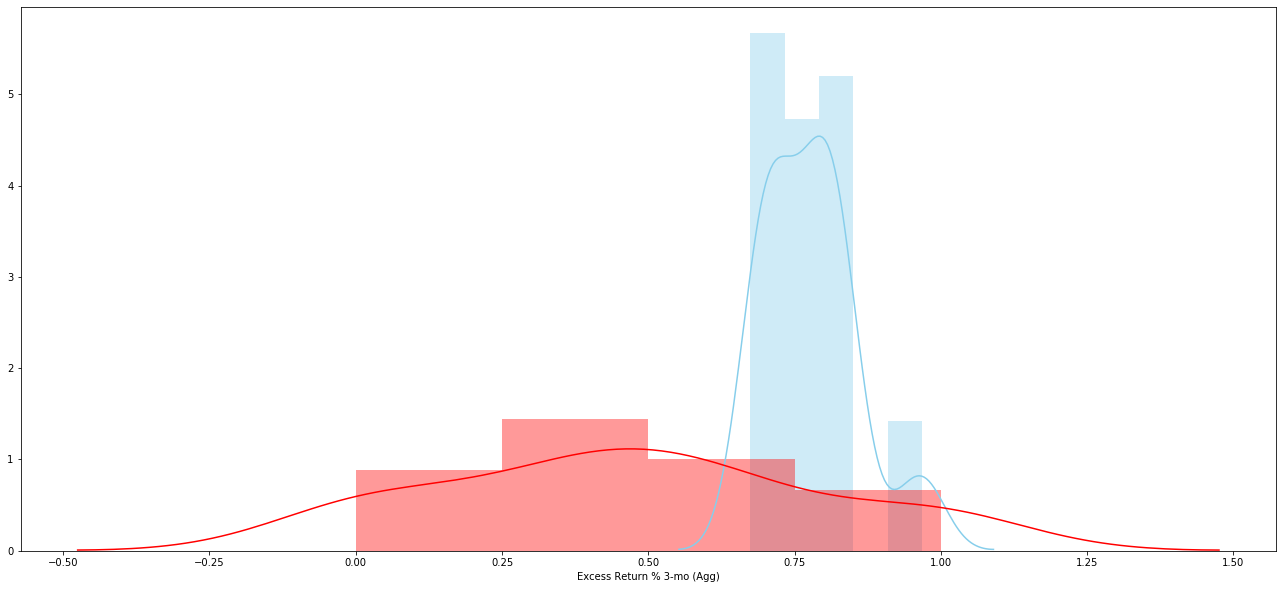

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 6-mo (Treasury)  36.0  0.478338  0.328622  0.054770   
 2                         combined  72.0  0.627719  0.280891  0.033103   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.367149  0.589528  
 2   0.561713  0.693725  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.2988
 1                              Degrees of freedom =   70.0000
 2                                               t =    5.3056
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.2506
 7                                       Hedge's g =    1.2371
 8                        

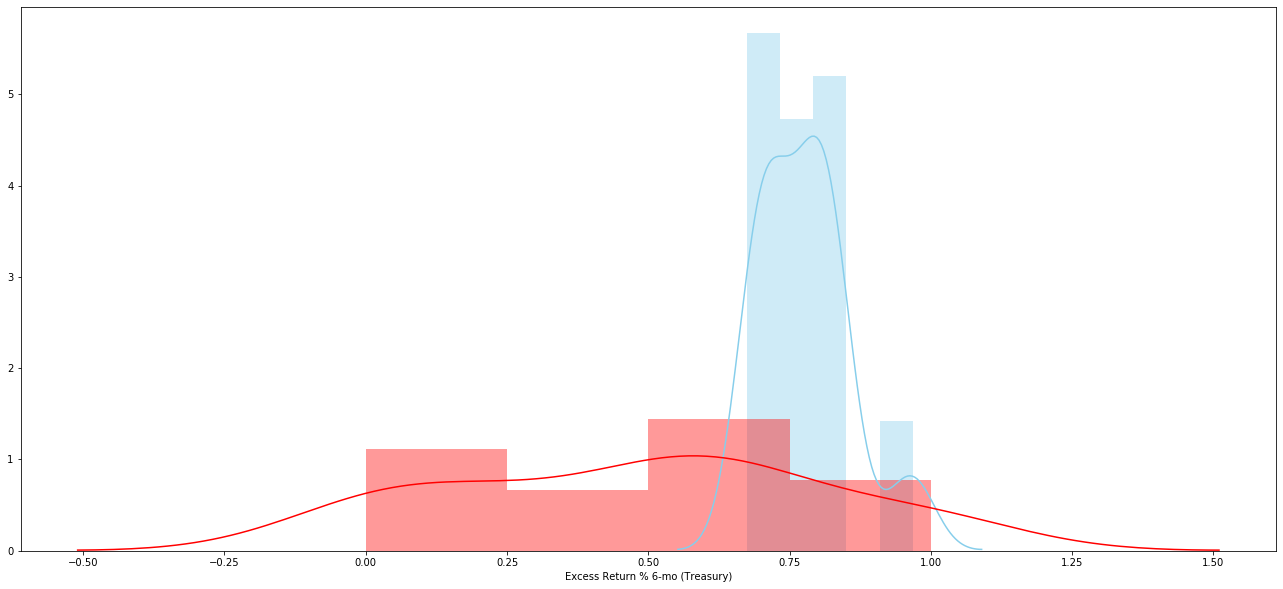

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  36.0  0.777100  0.078470  0.013078   0.750550   
 1  Excess Return % 6-mo (Agg)  36.0  0.452567  0.331239  0.055206   0.340492   
 2                    combined  72.0  0.614834  0.289523  0.034121   0.546799   
 
    Interval  
 0  0.803650  
 1  0.564643  
 2  0.682868  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.3245
 1                             Degrees of freedom =   70.0000
 2                                              t =    5.7202
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.3483
 7                                      Hedge's g =    1.3338
 8                                  Glass's delta =    

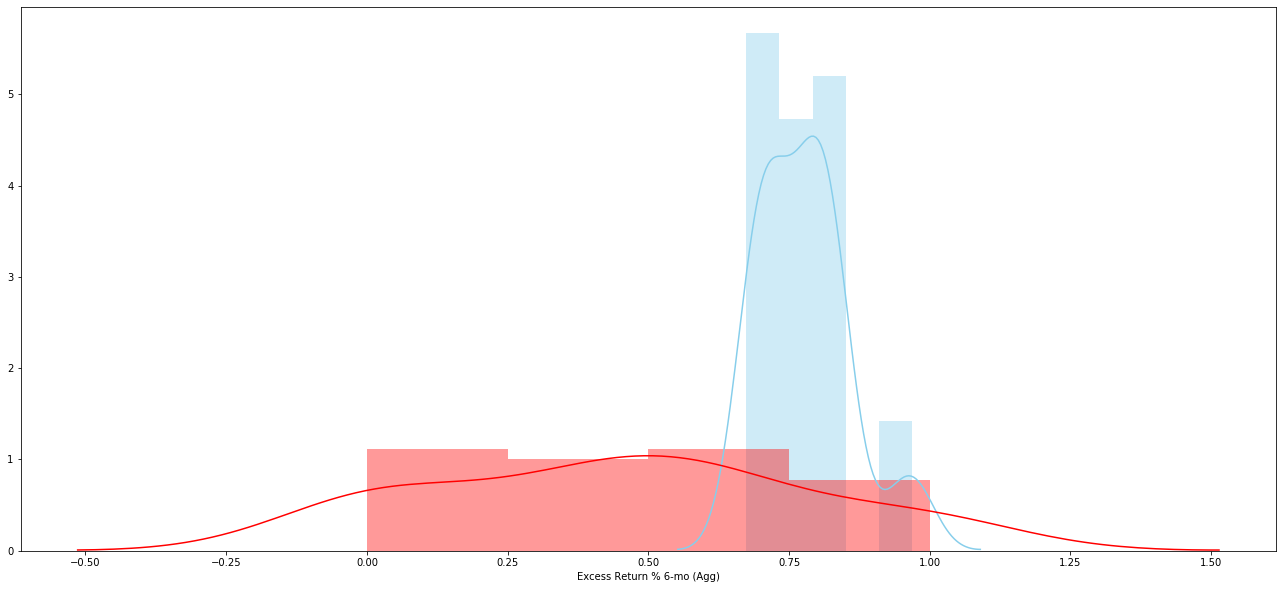

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 9-mo (Treasury)  36.0  0.514339  0.330769  0.055128   
 2                         combined  72.0  0.645720  0.272897  0.032161   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.402423  0.626256  
 2   0.581592  0.709847  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.2628
 1                              Degrees of freedom =   70.0000
 2                                               t =    4.6376
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.0931
 7                                       Hedge's g =    1.0813
 8                        

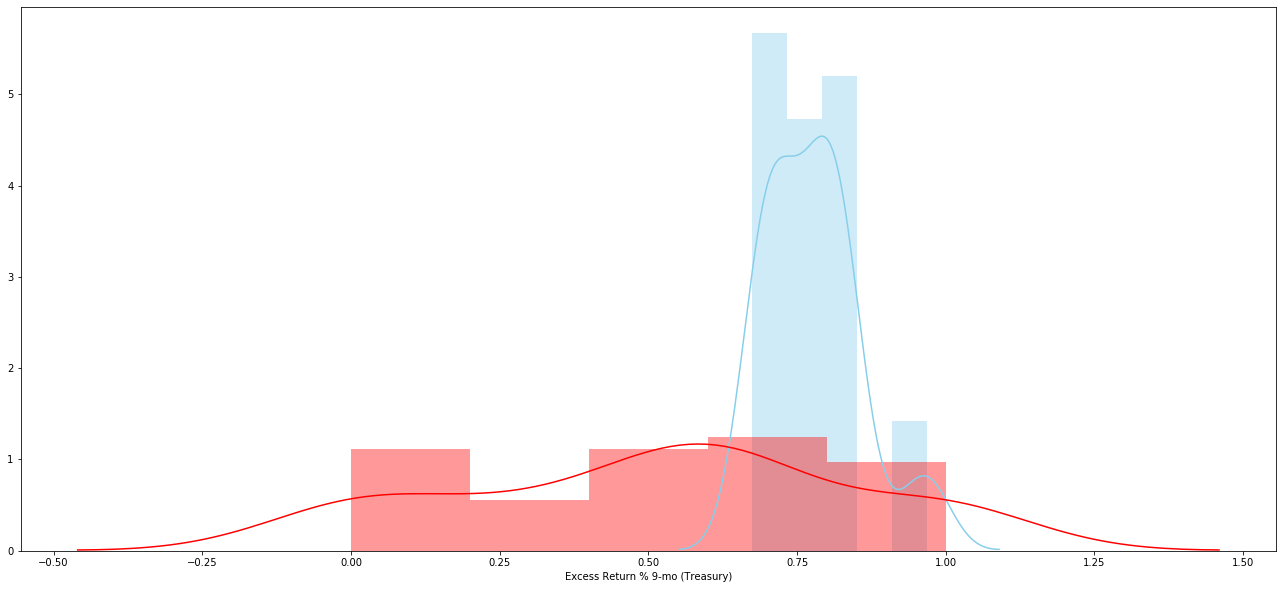

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  36.0  0.777100  0.078470  0.013078   0.750550   
 1  Excess Return % 9-mo (Agg)  36.0  0.483911  0.324211  0.054035   0.374213   
 2                    combined  72.0  0.630505  0.276847  0.032627   0.565450   
 
    Interval  
 0  0.803650  
 1  0.593608  
 2  0.695561  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.2932
 1                             Degrees of freedom =   70.0000
 2                                              t =    5.2736
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.2430
 7                                      Hedge's g =    1.2296
 8                                  Glass's delta =    

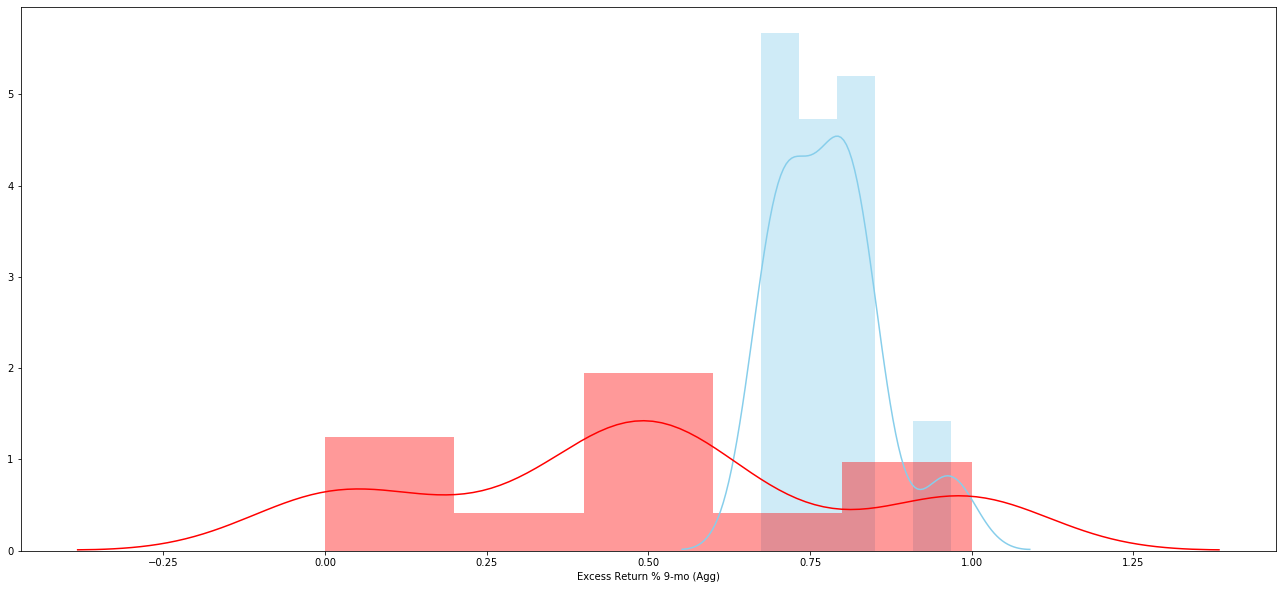

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 12-mo (Treasury)  36.0  0.521082  0.310640  0.051773   
 2                          combined  72.0  0.649091  0.259271  0.030555   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.415976  0.626187  
 2   0.588165  0.710017  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.2560
 1                              Degrees of freedom =   70.0000
 2                                               t =    4.7944
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.1300
 7                                       Hedge's g =    1.1179
 8                    

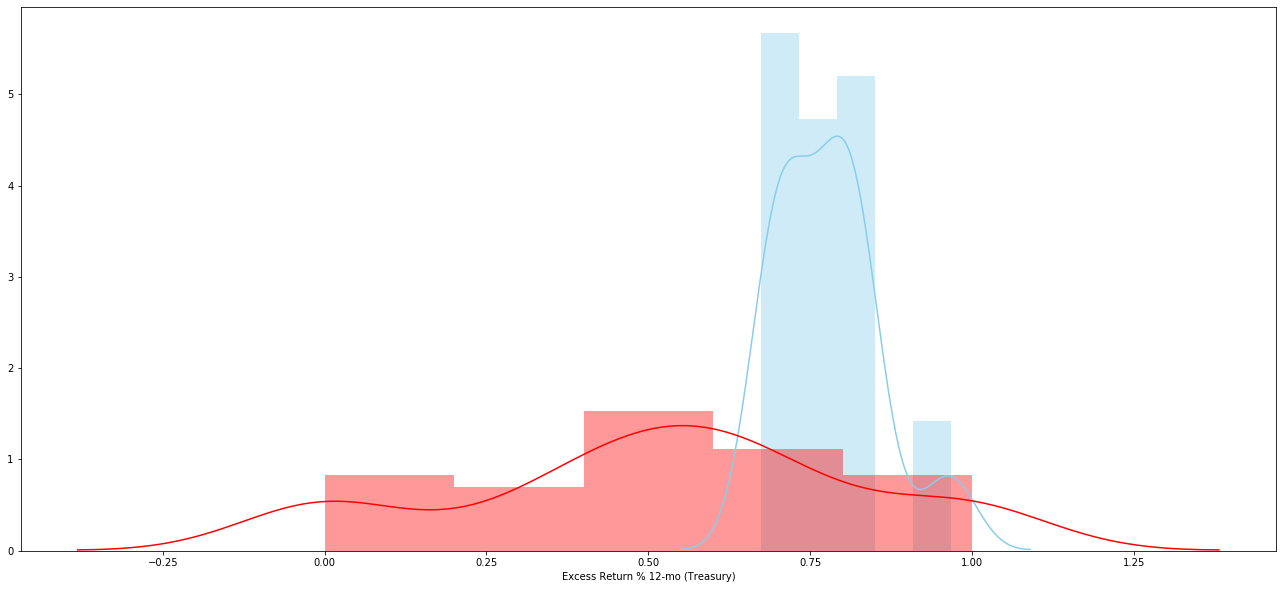

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  36.0  0.777100  0.078470  0.013078   0.750550   
 1  Excess Return % 12-mo (Agg)  36.0  0.491103  0.306580  0.051097   0.387371   
 2                     combined  72.0  0.634101  0.264775  0.031204   0.571882   
 
    Interval  
 0  0.803650  
 1  0.594835  
 2  0.696321  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.2860
 1                              Degrees of freedom =   70.0000
 2                                               t =    5.4224
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.2781
 7                                       Hedge's g =    1.2643
 8                                   Glass

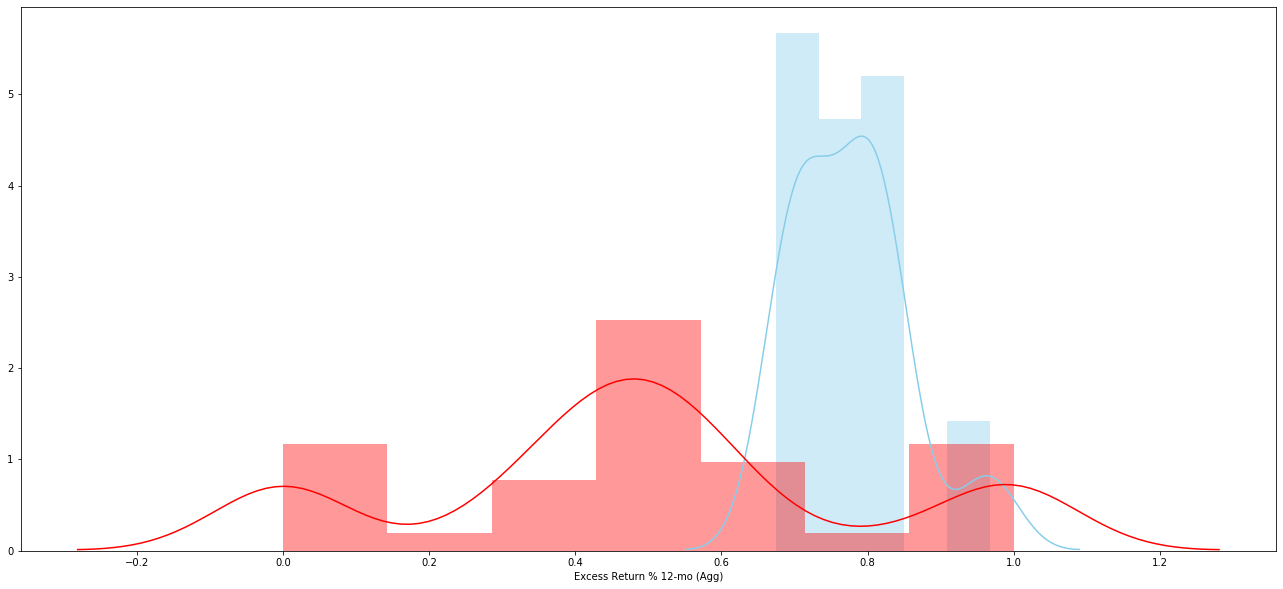

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 24-mo (Treasury)  36.0  0.505788  0.293592  0.048932   
 2                          combined  72.0  0.641444  0.253354  0.029858   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.406451  0.605125  
 2   0.581909  0.700979  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.2713
 1                              Degrees of freedom =   70.0000
 2                                               t =    5.3567
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.2626
 7                                       Hedge's g =    1.2490
 8                    

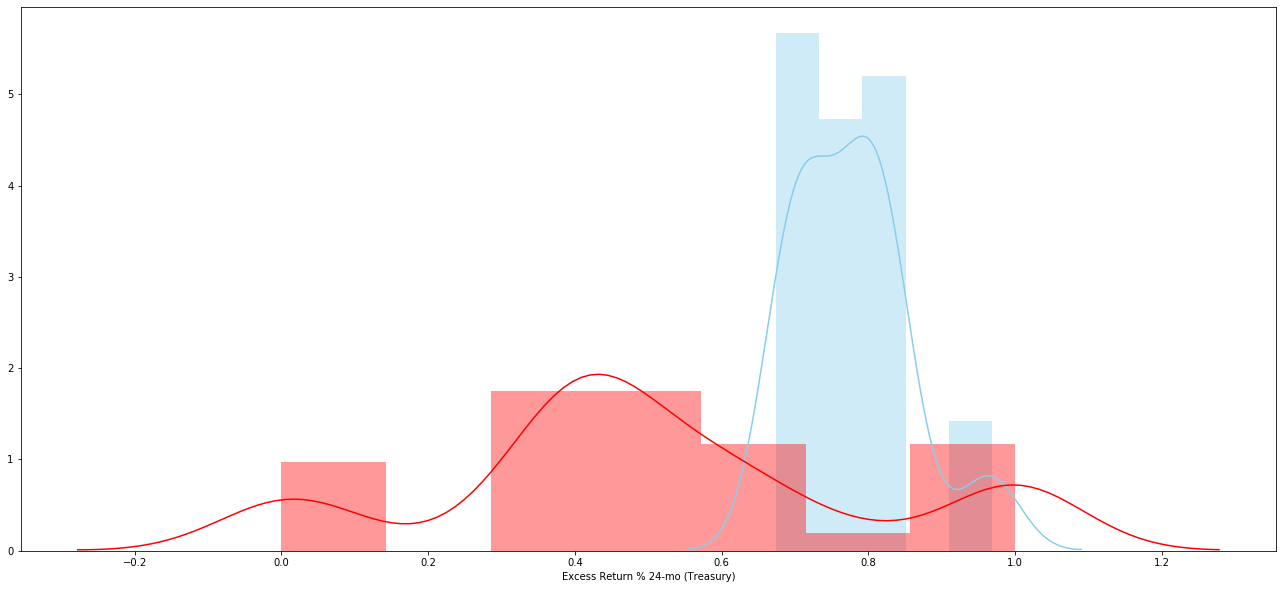

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  36.0  0.777100  0.078470  0.013078   0.750550   
 1  Excess Return % 24-mo (Agg)  36.0  0.470644  0.291009  0.048502   0.372180   
 2                     combined  72.0  0.623872  0.261900  0.030865   0.562328   
 
    Interval  
 0  0.803650  
 1  0.569107  
 2  0.685415  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.3065
 1                              Degrees of freedom =   70.0000
 2                                               t =    6.1006
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.4379
 7                                       Hedge's g =    1.4225
 8                                   Glass

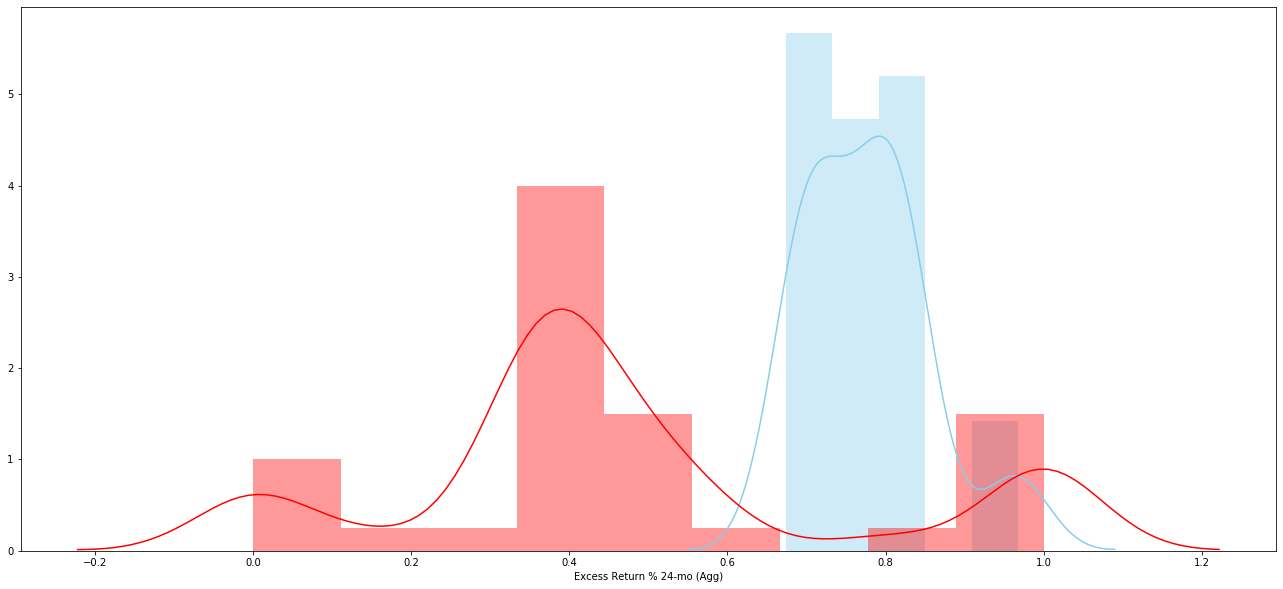

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 36-mo (Treasury)  36.0  0.520990  0.204145  0.034024   
 2                          combined  72.0  0.649045  0.200521  0.023632   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.451917  0.590063  
 2   0.601925  0.696165  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.2561
 1                              Degrees of freedom =   70.0000
 2                                               t =    7.0261
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.6561
 7                                       Hedge's g =    1.6383
 8                    

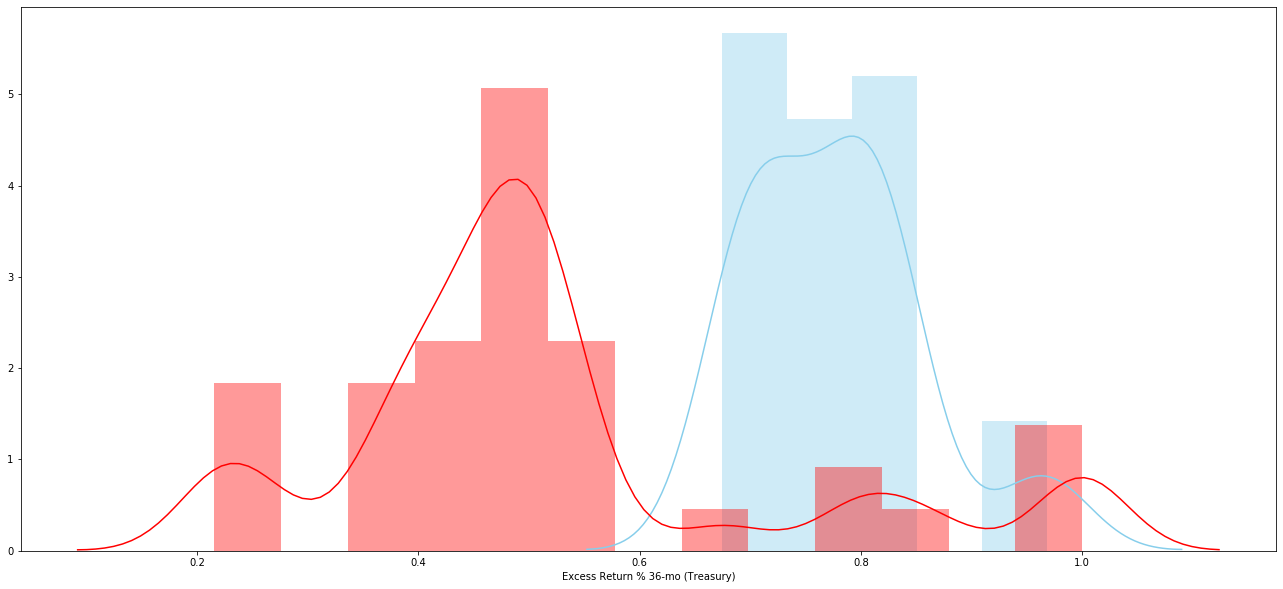

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  36.0  0.777100  0.078470  0.013078   0.750550   
 1  Excess Return % 36-mo (Agg)  36.0  0.506182  0.208351  0.034725   0.435686   
 2                     combined  72.0  0.641641  0.207467  0.024450   0.592889   
 
    Interval  
 0  0.803650  
 1  0.576678  
 2  0.690393  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.2709
 1                              Degrees of freedom =   70.0000
 2                                               t =    7.3011
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.7209
 7                                       Hedge's g =    1.7024
 8                                   Glass

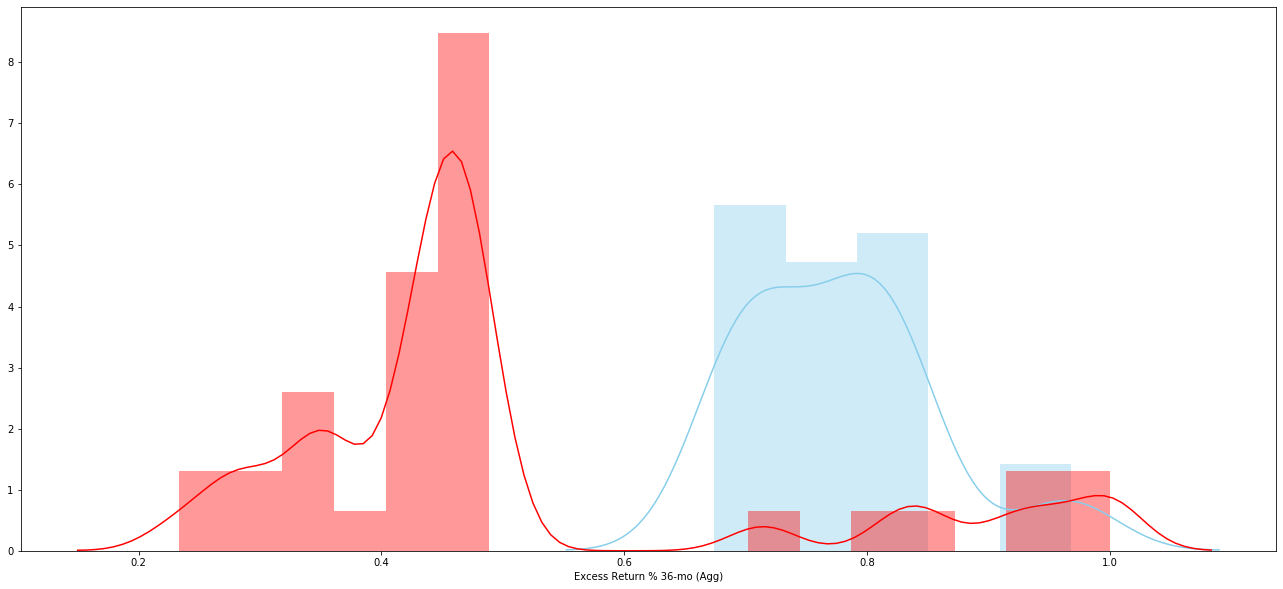

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_FRPS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.499596,0.497619,0.498871,0.486959,0.491705,0.485184,0.488772,0.494764,0.495848,0.487819,0.497761,0.473469,0.482113,0.462641,0.461482,2.55914
std,0.199647,0.223015,0.227708,0.233621,0.234617,0.232990,0.235452,0.231428,0.236072,0.225139,0.229379,0.231109,0.227496,0.227934,0.220252,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.371684,0.374153,0.374529,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.515250,0.507964,0.511728,0.514152,0.507158,0.507324,0.513215,0.510664,0.510860,0.502246,0.500336,0.479800,0.491677,0.482190,0.470409,3.00000
75%,0.623067,0.623599,0.623407,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 3-mo (Treasury)  278.0  0.486959  0.233621  0.014012   
 2                         combined  314.0  0.520223  0.239921  0.013540   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.459376  0.514541  
 2   0.493583  0.546863  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2901
 1                              Degrees of freedom =   312.0000
 2                                               t =     7.3888
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3088
 7                                       Hedge's g =     1.3056
 8           

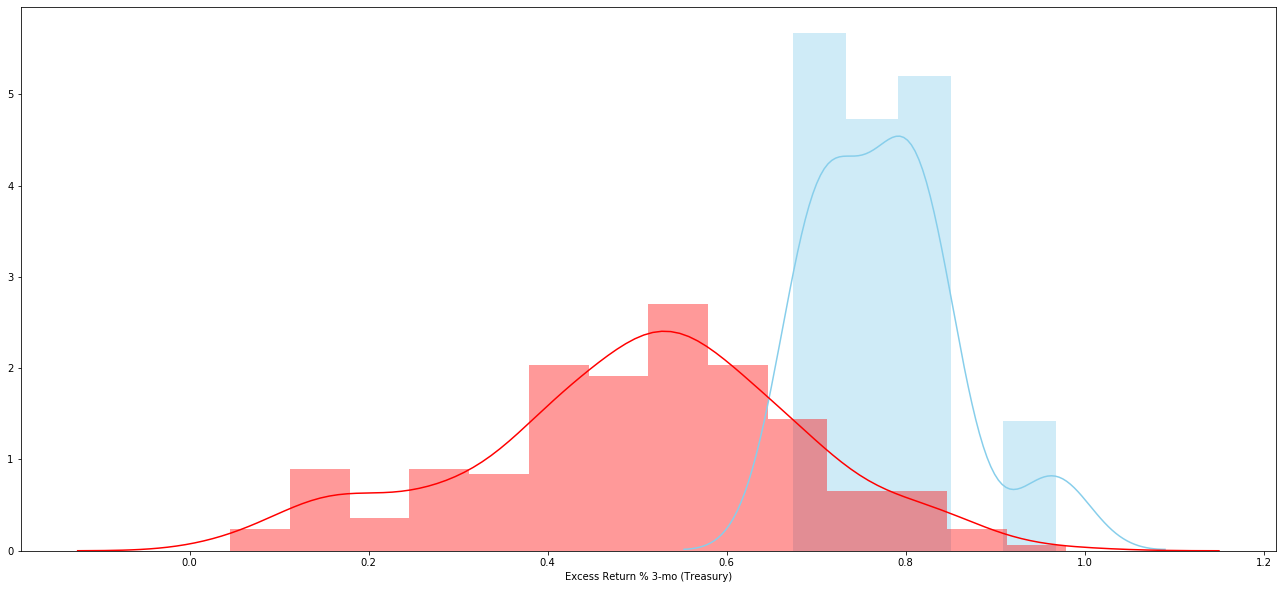

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   36.0  0.777100  0.078470  0.013078   0.750550   
 1  Excess Return % 3-mo (Agg)  278.0  0.491705  0.234617  0.014071   0.464004   
 2                    combined  314.0  0.524425  0.240202  0.013555   0.497754   
 
    Interval  
 0  0.803650  
 1  0.519405  
 2  0.551096  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2854
 1                             Degrees of freedom =   312.0000
 2                                              t =     7.2374
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.2820
 7                                      Hedge's g =     1.2789
 8                                  Glass'

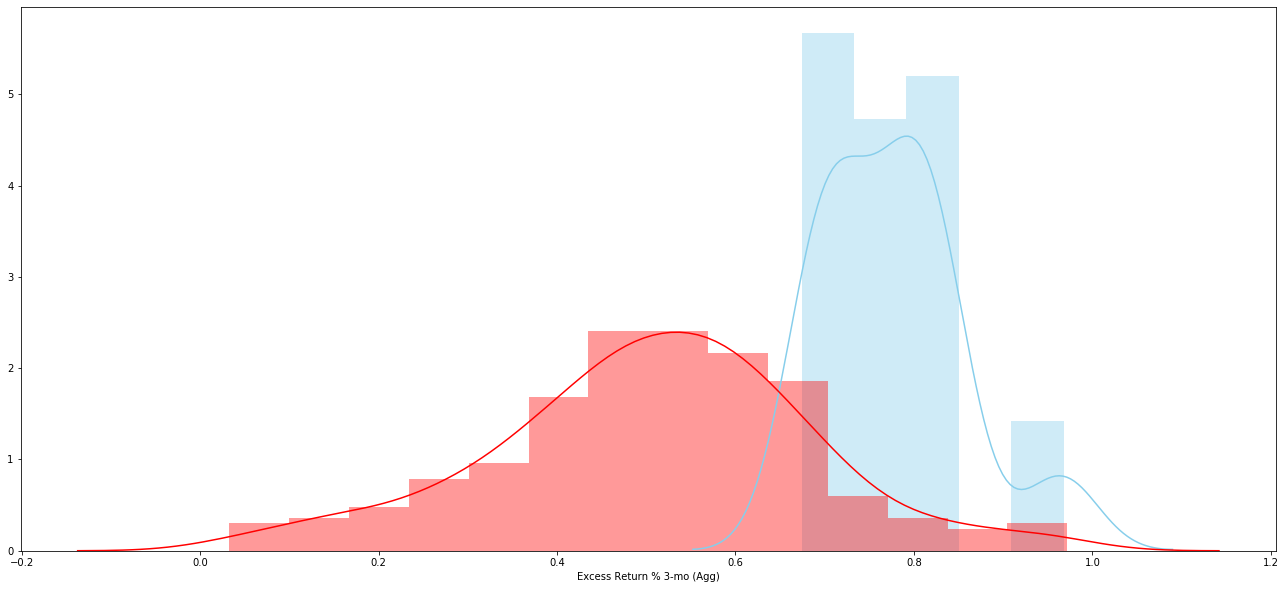

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 6-mo (Treasury)  275.0  0.485184  0.232990  0.014050   
 2                         combined  311.0  0.518975  0.239637  0.013589   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.457525  0.512843  
 2   0.492237  0.545712  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2919
 1                              Degrees of freedom =   309.0000
 2                                               t =     7.4531
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3210
 7                                       Hedge's g =     1.3178
 8           

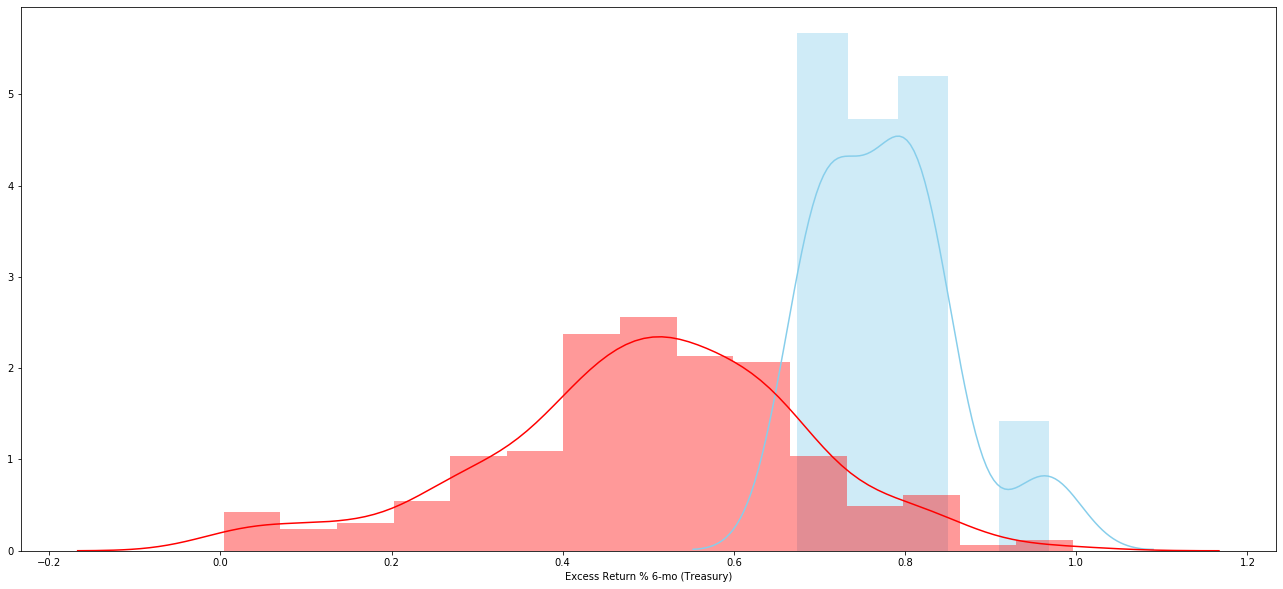

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   36.0  0.777100  0.078470  0.013078   0.750550   
 1  Excess Return % 6-mo (Agg)  275.0  0.488772  0.235452  0.014198   0.460820   
 2                    combined  311.0  0.522147  0.241313  0.013684   0.495223   
 
    Interval  
 0  0.803650  
 1  0.516723  
 2  0.549072  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2883
 1                             Degrees of freedom =   309.0000
 2                                              t =     7.2856
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.2913
 7                                      Hedge's g =     1.2882
 8                                  Glass'

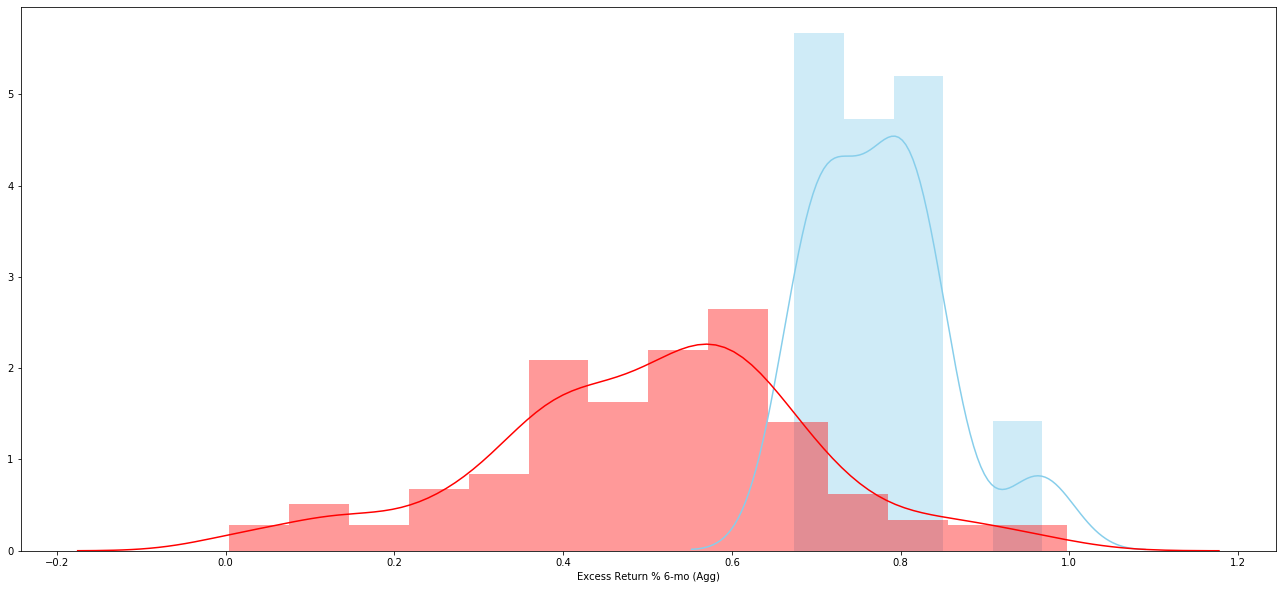

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 9-mo (Treasury)  272.0  0.494764  0.231428  0.014032   
 2                         combined  308.0  0.527764  0.237140  0.013512   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.467138  0.522390  
 2   0.501176  0.554353  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2823
 1                              Degrees of freedom =   306.0000
 2                                               t =     7.2558
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2868
 7                                       Hedge's g =     1.2837
 8           

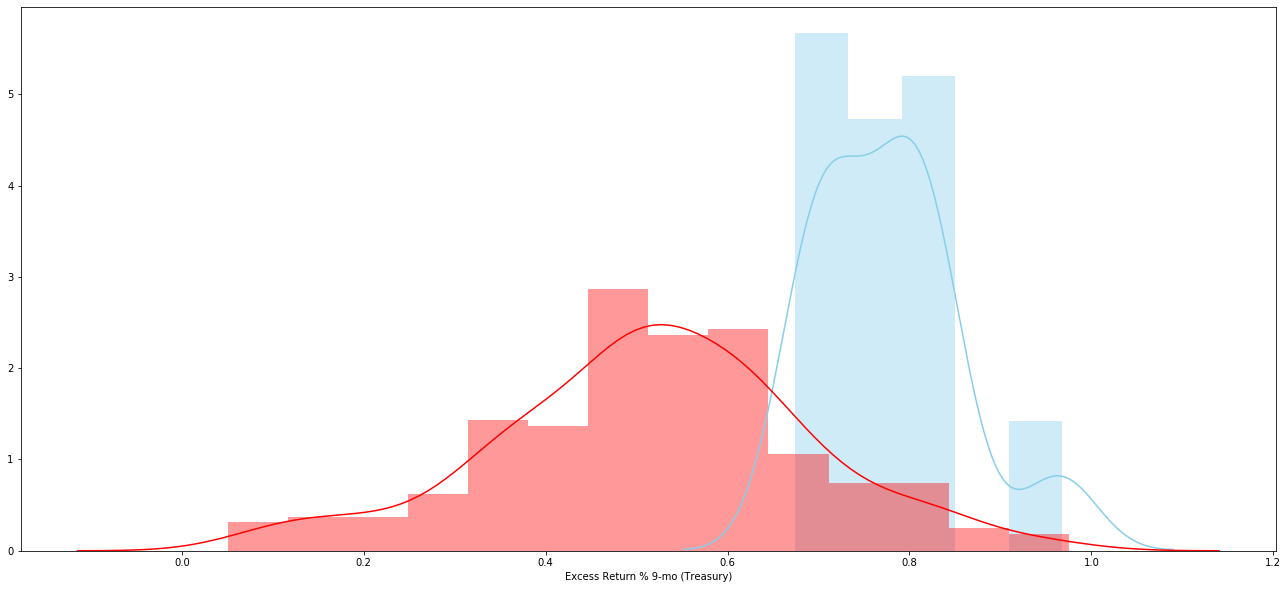

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   36.0  0.777100  0.078470  0.013078   0.750550   
 1  Excess Return % 9-mo (Agg)  272.0  0.495848  0.236072  0.014314   0.467668   
 2                    combined  308.0  0.528722  0.241015  0.013733   0.501699   
 
    Interval  
 0  0.803650  
 1  0.524029  
 2  0.555745  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2813
 1                             Degrees of freedom =   306.0000
 2                                              t =     7.0878
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.2570
 7                                      Hedge's g =     1.2540
 8                                  Glass'

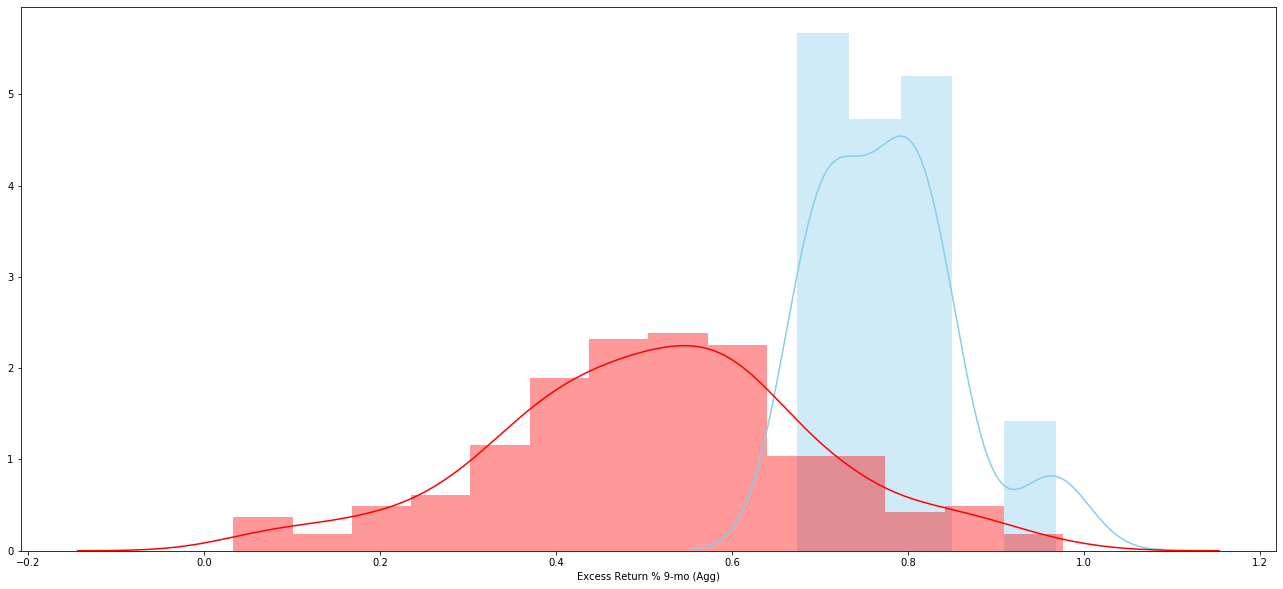

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 12-mo (Treasury)  269.0  0.487819  0.225139  0.013727   
 2                          combined  305.0  0.521964  0.232667  0.013322   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.460793  0.514846  
 2   0.495748  0.548180  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2893
 1                              Degrees of freedom =   303.0000
 2                                               t =     7.6381
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3555
 7                                       Hedge's g =     1.3522
 8       

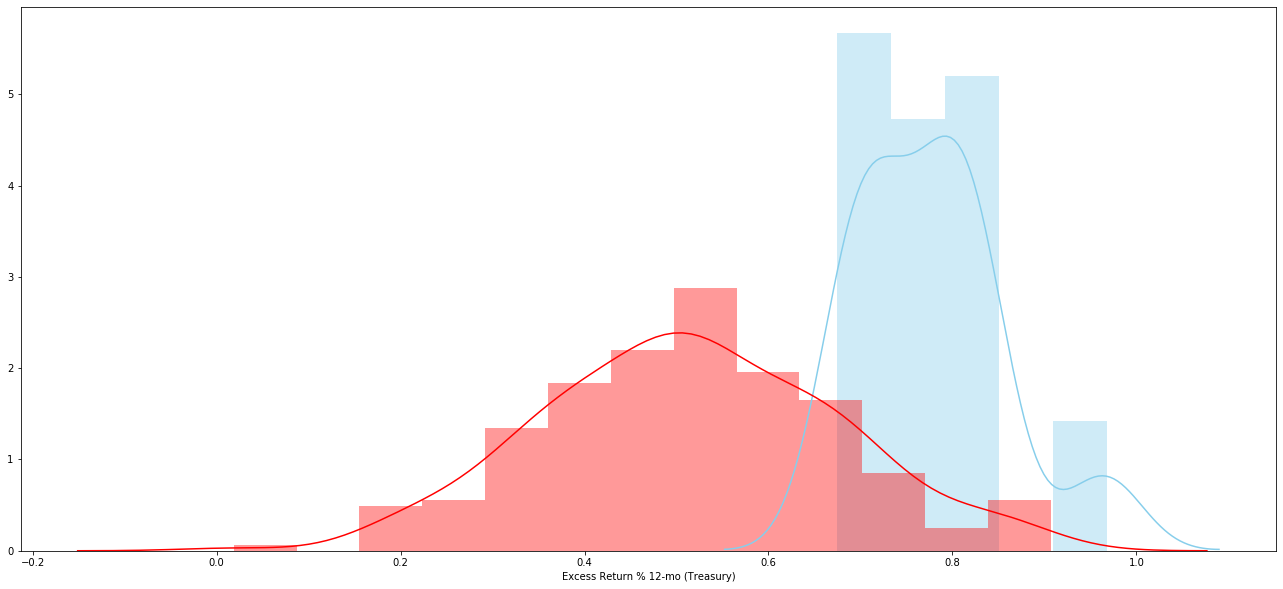

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 12-mo (Agg)  269.0  0.497761  0.229379  0.013985   
 2                     combined  305.0  0.530733  0.235038  0.013458   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.470226  0.525297  
 2   0.504249  0.557216  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2793
 1                              Degrees of freedom =   303.0000
 2                                               t =     7.2413
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2851
 7                                       Hedge's g =     1.2819
 8                           

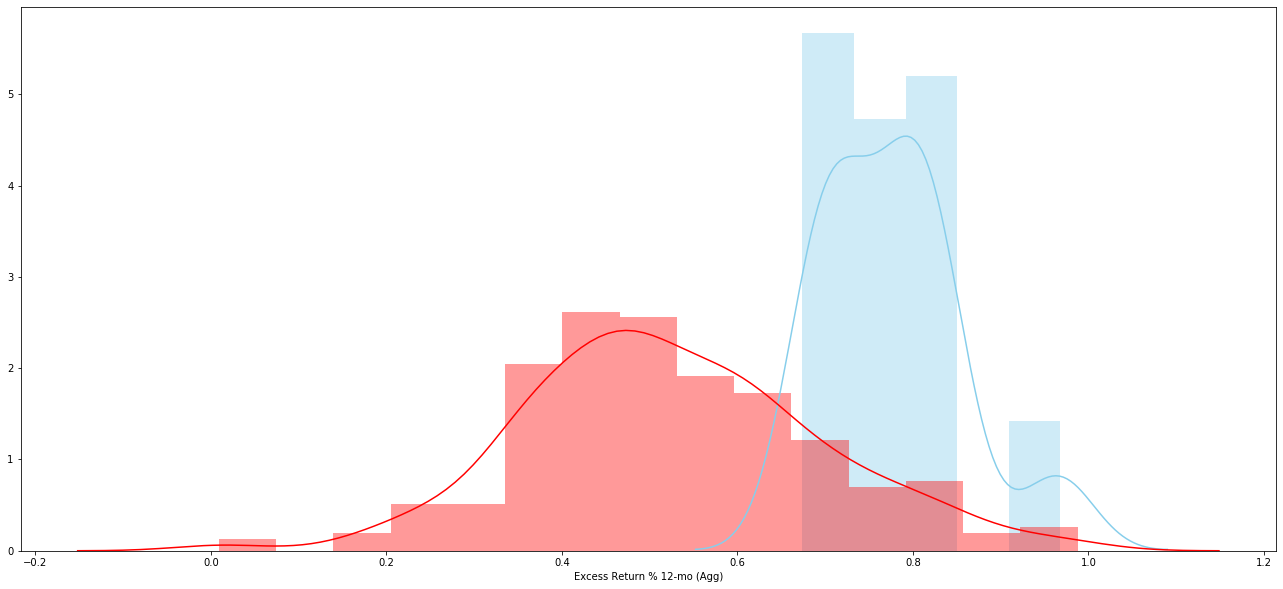

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 24-mo (Treasury)  257.0  0.473469  0.231109  0.014416   
 2                          combined  293.0  0.510775  0.239863  0.014013   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.445080  0.501859  
 2   0.483196  0.538355  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.3036
 1                              Degrees of freedom =   291.0000
 2                                               t =     7.8099
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3898
 7                                       Hedge's g =     1.3862
 8       

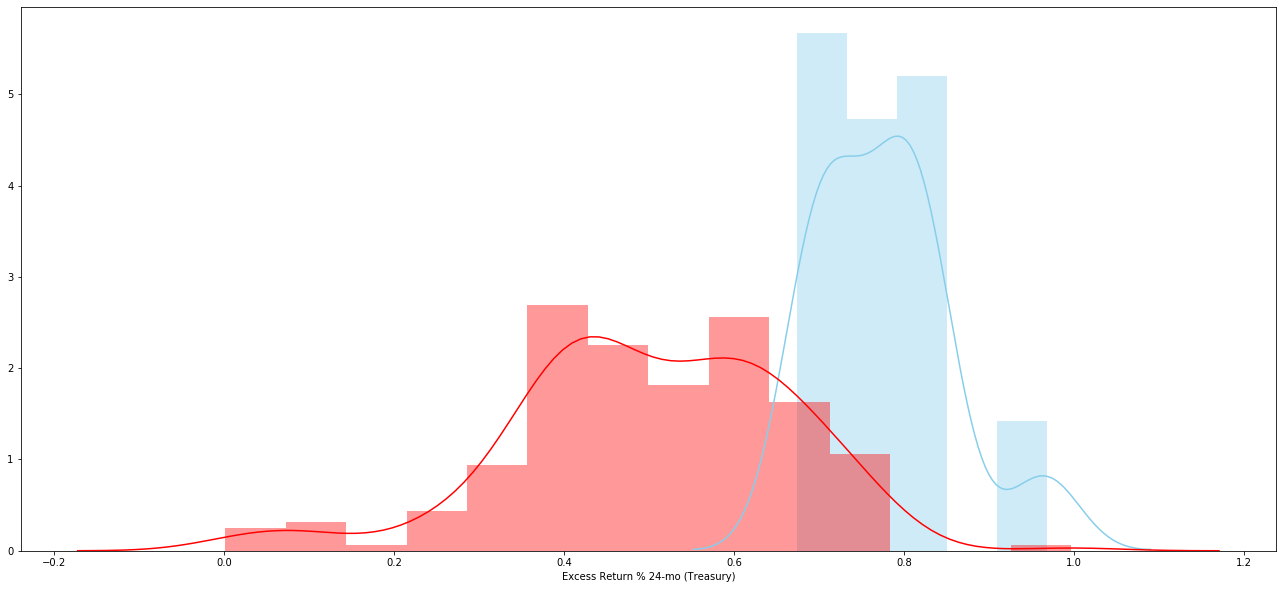

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 24-mo (Agg)  257.0  0.482113  0.227496  0.014191   
 2                     combined  293.0  0.518357  0.235631  0.013766   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.454167  0.510059  
 2   0.491265  0.545450  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2950
 1                              Degrees of freedom =   291.0000
 2                                               t =     7.7061
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3714
 7                                       Hedge's g =     1.3678
 8                           

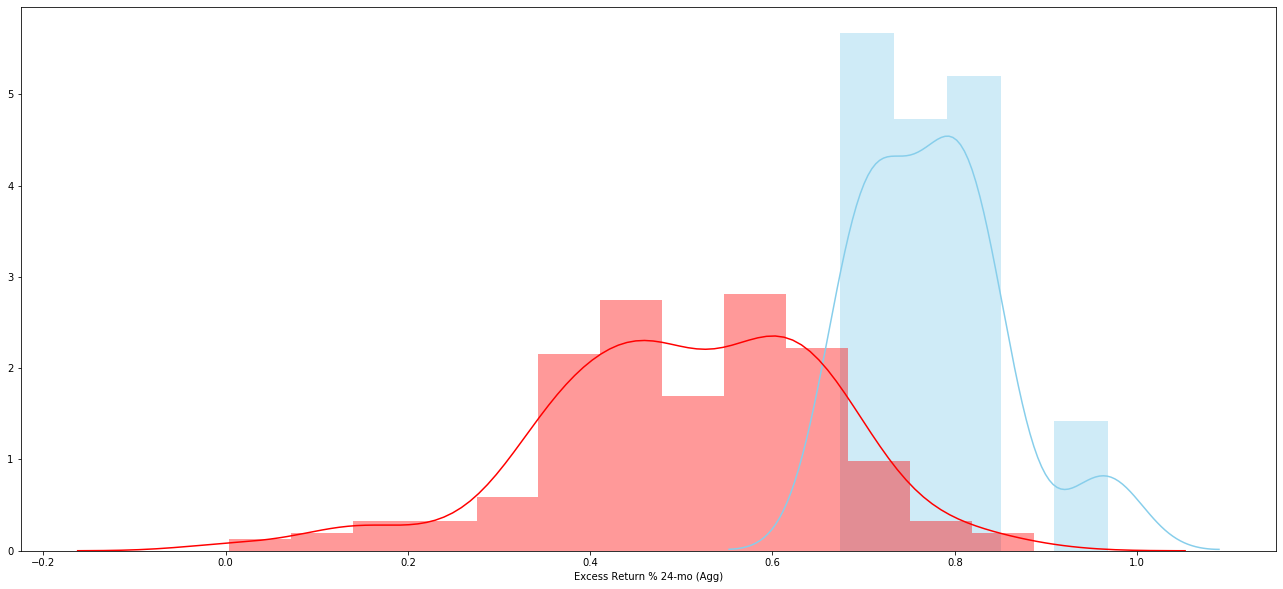

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 36-mo (Treasury)  245.0  0.462641  0.227934  0.014562   
 2                          combined  281.0  0.502927  0.239016  0.014258   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.433957  0.491324  
 2   0.474860  0.530995  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.3145
 1                              Degrees of freedom =   279.0000
 2                                               t =     8.1957
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4629
 7                                       Hedge's g =     1.4589
 8       

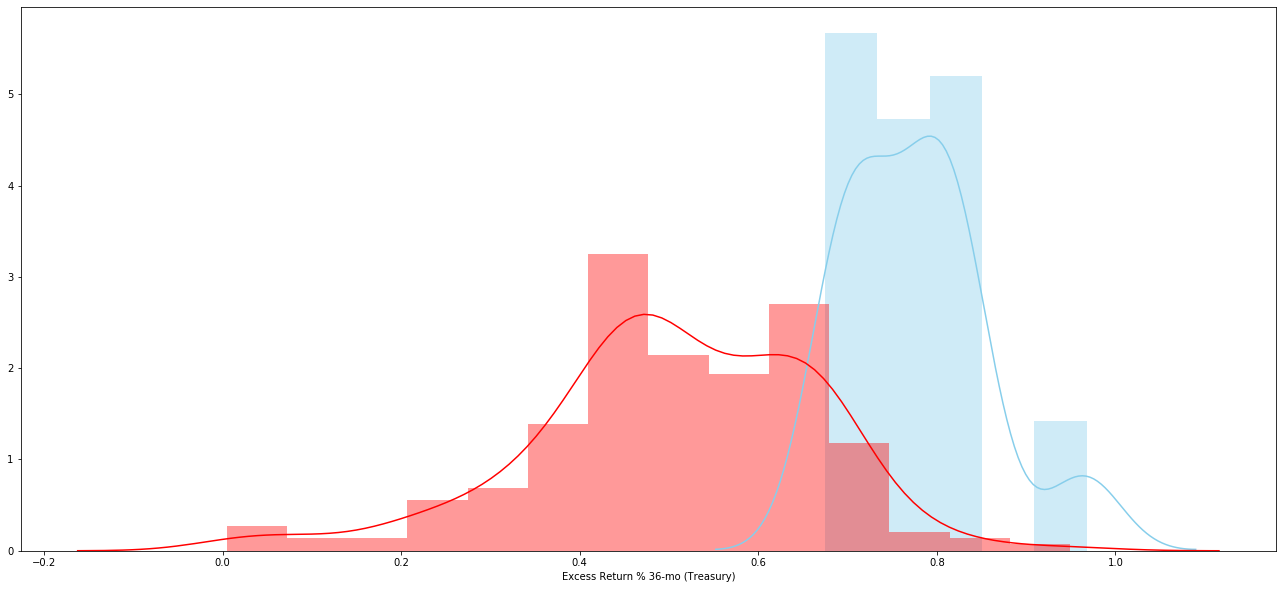

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   36.0  0.777100  0.078470  0.013078   
 1  Excess Return % 36-mo (Agg)  245.0  0.461482  0.220252  0.014071   
 2                     combined  281.0  0.501917  0.232831  0.013890   
 
    95% Conf.  Interval  
 0   0.750550  0.803650  
 1   0.433765  0.489199  
 2   0.474576  0.529258  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.3156
 1                              Degrees of freedom =   279.0000
 2                                               t =     8.5077
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5186
 7                                       Hedge's g =     1.5145
 8                           

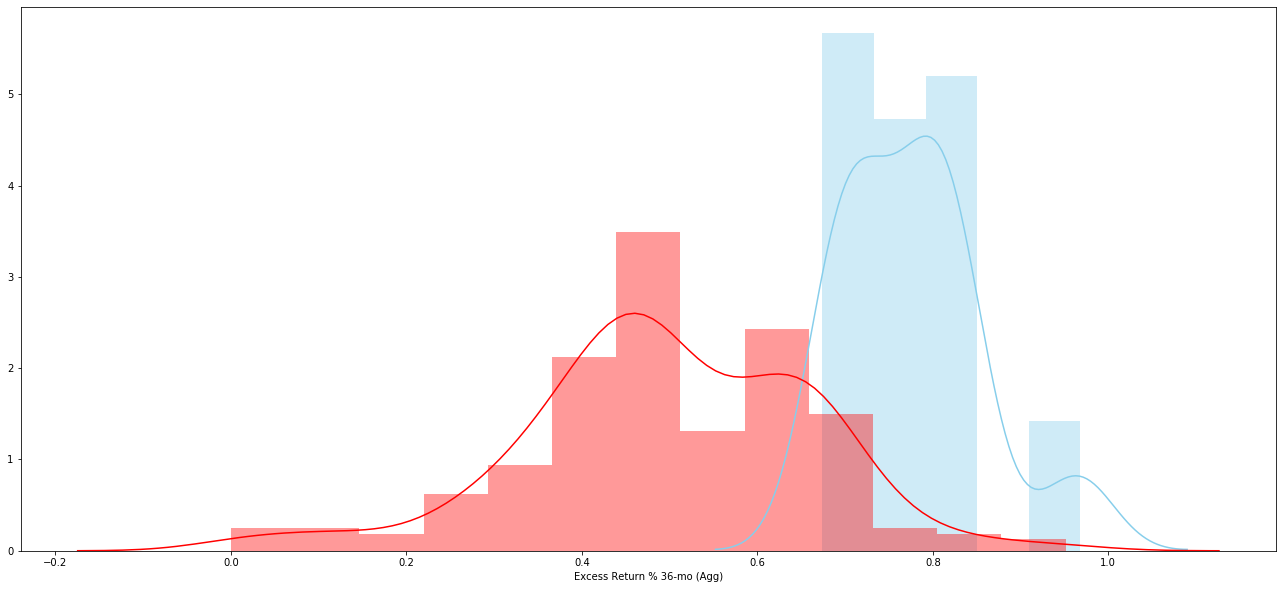

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")